## Our data is a single-cell RNAseq dataset where columns are cells (cell types and cell states) and rows are the genes. It has to be tab-separated.

In [1]:
import pandas as pd

data = pd.read_csv("/Users/tgn531/Desktop/fava/Example_dataset_GSE75748_sc_cell_type_ec.tsv", 
                   sep='\t') 

### Our data look like this:

In [2]:
data

,H1_Exp1.001,H1_Exp1.002,H1_Exp1.003,H1_Exp1.004,H1_Exp1.006,H1_Exp1.007,H1_Exp1.008,H1_Exp1.009,H1_Exp1.010,H1_Exp1.011,...,TB_Batch2.135,TB_Batch2.136,TB_Batch2.137,TB_Batch2.138,TB_Batch2.139,TB_Batch2.140,TB_Batch2.141,TB_Batch2.142,TB_Batch2.143,TB_Batch2.144
MKL2,10.00,162.00,3.00,42.00,0.00,2.00,18.00,0.00,182.00,2.00,...,364.98,1.00,21.00,1127.80,2119.00,5.00,500.96,18.00,472.08,350.00
CD109,6.38,2.62,166.80,9.68,7.32,53.89,4.63,64.54,29.93,12.10,...,15.22,38.66,38.56,11.53,48.21,23.88,362.56,22.72,36.62,25.78
ABTB1,0.00,28.00,0.00,1.00,0.00,9.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,39.00,0.00
MAST2,0.00,133.00,41.00,0.00,0.00,2.00,0.00,0.00,0.00,8.00,...,175.00,41.00,32.00,3.00,6.00,206.00,43.04,2.00,1.00,99.00
KAT5,0.00,7.06,52.95,20.16,0.00,6.29,0.00,0.00,103.00,122.46,...,0.00,577.91,0.00,3.00,2.00,0.00,56.77,2.04,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WDR33,101.00,201.44,23.31,164.65,181.49,135.93,233.00,105.00,215.98,371.10,...,512.80,9.86,776.49,1683.81,366.29,5.24,79.92,6.71,124.06,60.45
EPSTI1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,455.00,330.24,290.00,523.00,242.00,146.00,539.00,0.00,21.32,472.01
CLPTM1L,22.00,84.46,19.00,52.00,2.00,24.00,109.00,13.00,11.00,4.00,...,268.00,37.00,12.00,0.00,0.00,0.00,296.00,0.00,271.00,0.00
CCDC125,32.57,52.04,110.97,73.82,53.15,79.23,27.85,54.49,106.26,69.77,...,276.59,244.83,246.80,167.79,336.73,221.86,166.23,131.41,730.10,297.28


## Import FAVA

In [3]:
from favapy import fava

### FAVA provides multiple parameters, but the only mandatory one is the data path. After defining the location of the data, users could optionally define the other parameters.
#### The dimensions of the hidden layer (intermediate_dim).  Default value = 500.
#### The dimensions of the latent space (latent_dim). Default value = 100.
#### The number of epochs (epochs). Default value = 100.
#### The batch size (batch_size). Default value = 32.
#### The cut-off on the Pearson Correlation scores (PCC_cutoff). Default value = 0.7.


In [4]:
#The function we want to call is the fava_notebook
my_FAVAourite_network = fava.fava_notebook("/Users/tgn531/Desktop/fava/Example_dataset_GSE75748_sc_cell_type_ec.tsv", 
                             epochs=10, 
                             PCC_cutoff=0.98)


Epoch 1/10
597/597 [==============================] - 6s 9ms/step - loss: 36.7207 - accuracy: 0.0049 - val_loss: 30.0733 - val_accuracy: 0.0080
Epoch 2/10
597/597 [==============================] - 5s 9ms/step - loss: 29.1569 - accuracy: 0.0103 - val_loss: 27.8901 - val_accuracy: 0.0132
Epoch 3/10
597/597 [==============================] - 5s 9ms/step - loss: 27.7052 - accuracy: 0.0110 - val_loss: 27.0824 - val_accuracy: 0.0136
Epoch 4/10
597/597 [==============================] - 5s 8ms/step - loss: 27.1234 - accuracy: 0.0141 - val_loss: 26.8778 - val_accuracy: 0.0197
Epoch 5/10
597/597 [==============================] - 5s 8ms/step - loss: 26.7110 - accuracy: 0.0197 - val_loss: 26.4593 - val_accuracy: 0.0259
Epoch 6/10
597/597 [==============================] - 5s 8ms/step - loss: 26.3820 - accuracy: 0.0283 - val_loss: 26.1247 - val_accuracy: 0.0283
Epoch 7/10
597/597 [==============================] - 5s 8ms/step - loss: 26.1108 - accuracy: 0.0366 - val_loss: 25.8408 - val_accuracy:

In [5]:
my_FAVAourite_network

,Protein_1,Protein_2,Score
209591662,SULT1A4,SULT1A3,0.992615
39866414,SULT1A3,SULT1A4,0.992615
240587027,MTRNR2L1,MTRNR2L10,0.990462
57704635,MTRNR2L10,MTRNR2L1,0.990462
228767653,OR2A42,OR2A1,0.989603
...,...,...,...
250008991,SPN,CABP4,0.980030
331471218,RPS14,RPS7,0.980022
87653490,RPS7,RPS14,0.980022
18766358,RPL5,RPL21,0.980013


In [6]:
my_FAVAourite_network_single = my_FAVAourite_network.iloc[::2, :]
my_FAVAourite_network_single


,Protein_1,Protein_2,Score
209591662,SULT1A4,SULT1A3,0.992615
240587027,MTRNR2L1,MTRNR2L10,0.990462
228767653,OR2A42,OR2A1,0.989603
86569235,LOC100288255,FRG2,0.989264
103601062,BOLA2B,BOLA2,0.988588
...,...,...,...
964825,MT-ND4,MT-CO2,0.980079
95540706,ZNF793,ARGFX,0.980075
194114999,CABP4,SPN,0.980030
331471218,RPS14,RPS7,0.980022


In [7]:
import networkx as nx

In [8]:
G = nx.from_pandas_edgelist(my_FAVAourite_network_single,
                           source = 'Protein_1',
                           target = 'Protein_2',
                           edge_attr = 'Score')

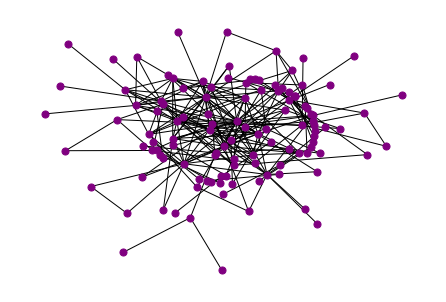

In [9]:
nx.draw_kamada_kawai(G, node_size = 50, node_color="purple")

In [10]:
from pyvis.network import Network

In [45]:
net = Network(height='800px', width='100%', bgcolor='#ffffff', 
                font_color='black',notebook = True, directed=False)
net.from_nx(G)
net.show_buttons(filter_='physics')
#generate html file
net.show("fava.html")

### Playing with VAEs to extract only the latent space

In [16]:
import numpy as np

data_array = np.log(np.asarray(data, dtype=np.float32)) / np.max(np.log(np.asarray(data)), axis=1, keepdims=True)
data_array[np.isneginf(data_array)] = 0
data_array = np.nan_to_num(data_array)


In [57]:
import tensorflow as tf

batch_size = 32
original_dim = data_array.shape[1]
intermediate_dim = 50
latent_dim = 3
epochs = 5
x_train = x_test = data_array
opt = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=0.001)

vae = fava.VAE(opt, x_train, x_test, batch_size, original_dim, intermediate_dim, latent_dim, epochs)
latent_space = np.array(vae.encoder.predict(x_test, batch_size=batch_size))


Epoch 1/5
29/29 [==============================] - 1s 7ms/step - loss: 135.3088 - accuracy: 0.0000e+00 - val_loss: 127.9559 - val_accuracy: 0.0011
Epoch 2/5
29/29 [==============================] - 0s 3ms/step - loss: 116.0974 - accuracy: 0.0011 - val_loss: 102.3333 - val_accuracy: 0.0022
Epoch 3/5
29/29 [==============================] - 0s 3ms/step - loss: 84.4725 - accuracy: 0.0022 - val_loss: 65.4880 - val_accuracy: 0.0043
Epoch 4/5
29/29 [==============================] - 0s 3ms/step - loss: 55.4453 - accuracy: 0.0033 - val_loss: 46.4867 - val_accuracy: 0.0011
Epoch 5/5
29/29 [==============================] - 0s 3ms/step - loss: 42.0718 - accuracy: 0.0022 - val_loss: 38.2947 - val_accuracy: 0.0022


In [66]:
latent_space = pd.DataFrame(latent_space[:,:,0].T)
latent_space.index = data.index
latent_space

,0,1,2
MKL2,1.007636,-0.453447,1.060920
CD109,-2.789653,-0.284460,-2.654455
ABTB1,0.452638,-0.073824,0.422337
MAST2,1.453179,-0.086208,1.359731
KAT5,1.931634,-0.378736,1.913245
...,...,...,...
DHX58,1.304577,-0.384837,1.386921
NUPR1,-0.404172,-0.460385,-0.486215
GPR62,0.493400,-0.171169,0.327346
PSAP,-0.774240,-0.212452,-0.675232
